In [1]:
%load_ext pycodestyle_magic
%flake8_on

In [84]:
# Imports
import os
import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import cv2
import random as rand
import xml.etree.ElementTree as ET

# Check versions of libraries
print(f"Python: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"OpenCV: {cv2.__version__}")
print(f"Albumentations: {A.__version__}")

Python: 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
numpy: 1.19.2
matplotlib: 3.3.2
OpenCV: 4.5.2
Albumentations: 0.5.2


In [8]:
CURRENT_DIR = os.getcwd()
TRAINING_SET_DIR = os.path.join(CURRENT_DIR, "images", "training_set")
VALIDATION_SET_DIR = os.path.join(CURRENT_DIR, "images", "validation_set")

IMAGE_WIDTH = 250
IMAGE_HEIGHT = 250

In [54]:
def parse_annotations(xml_file: str):
    """https://stackoverflow.com/questions/53317592/reading-pascal-voc-annotations-in-python"""
    """Parses the annotation file and returns the bounding boxes and species name"""
    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('object').find('name').text

        ymin, xmin, ymax, xmax = None, None, None, None

        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)

        list_with_single_boxes = [xmin, ymin, xmax, ymax]
        list_with_all_boxes.append(list_with_single_boxes)

    return filename, list_with_all_boxes

2:80: E501 line too long (95 > 79 characters)
3:80: E501 line too long (84 > 79 characters)


In [92]:
def load_data(DIR, IMAGE_WIDTH, IMAGE_HEIGHT):
    """Loads image data and species names from directory"""

    # Lists for image data and species names
    image_data = []
    species_names = []
    bounding_boxes = []

    for species_folder in os.listdir(DIR):
        for file in os.listdir(os.path.join(DIR, species_folder)):
            file_path = os.path.join(DIR, species_folder, file)

            # Looks for image files by checking extension
            if file_path.endswith(".jpg"):
                # Image is read and resized with cv2, then added to the list
                image = cv2.imread(file_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                resized_image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
                image_data.append(resized_image)

            # Only checks annotation files
            else:
                species_name, bounding_box = parse_annotations(file_path)
                species_names.append(species_name)
                bounding_boxes.append(bounding_box[0])

    return image_data, species_names, bounding_boxes

In [93]:
image_data_train, species_names_train, bounding_boxes_train\
    = load_data(TRAINING_SET_DIR, IMAGE_WIDTH, IMAGE_HEIGHT)
image_data_validation, species_names_validation, bounding_boxes_validation\
    = load_data(VALIDATION_SET_DIR, IMAGE_WIDTH, IMAGE_HEIGHT)

In [97]:
def imageView(images, labels):
    """displays a 3x3 subplot of randomly selected images"""
    fig, ax = plt.subplots(3, 3, figsize=(12, 12))
    for i in range(3):
        for j in range(3):
            # Selects a random image and displays it
            ind = rand.randint(0, len(images))
            ax[i, j].imshow(images[ind])
            # Displays the species name as the title
            ax[i, j].set_title(f"Species: {labels[ind]}")
    plt.show()

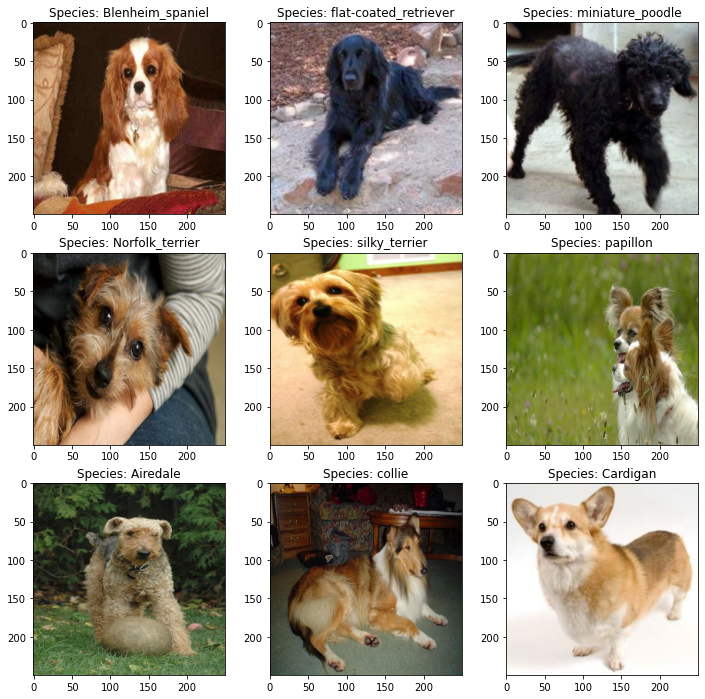

In [98]:
imageView(image_data_train, species_names_train)